<h2 style="text-align:center;font-weight:bold">Business understanding - Retail Data Analysis Project (Market Basket Analysis)</h2>

Welcome to my retail data analysis project! The primary focus remains on developing and researching solutions to enhance retail operations. The objective of this project is to leverage data from an unidentified grocery store and perform a comprehensive basket analysis. By analyzing customer purchase patterns, we aim to uncover valuable insights that can drive strategic decision-making.

Throughout the project, we will explore interactive visualizations to effectively communicate and explore the data. Interactive visualizations provide an intuitive and dynamic way to understand complex patterns and trends within the retail dataset.

We will emphasize the significance of data visualization as a powerful tool for guiding and validating decisions. By presenting data in visually appealing and interactive formats, we can facilitate a deeper understanding of the underlying trends and relationships.

By combining data analysis techniques, algorithmic approaches, and impactful visualizations, this project aims to unlock actionable insights and drive retail growth. Thank you for your interest in this project, and I look forward to sharing the findings and insights with the GitHub community.

As believed by Li (2017) "Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy."

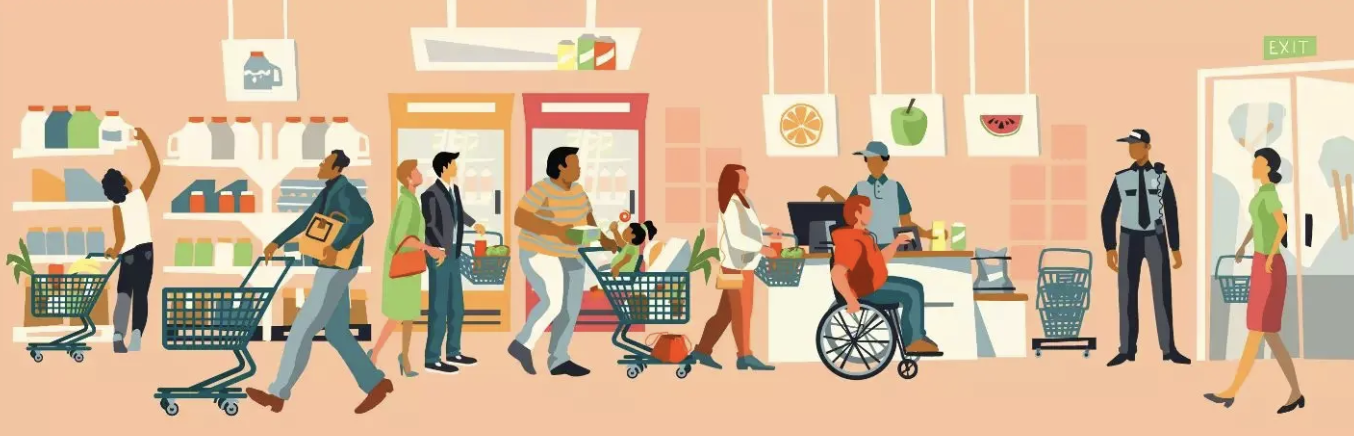

 <h2 style="text-align:center;font-weight:bold">Libraries</h2>

As stated by Ó Tuama (2022), “Libraries written in Python play a critical role in machine learning and data science. Each module in a Python library serves a specific purpose. Many different programs can benefit from the modularity of this library’s code. There are many advantages for the programmer as a result of this tool.” 

In [1]:
# In the event that the user doesn't have some unusual installation libraries.

# pip install sweetviz
# pip install mlxtend
# pip install jupyter-dash

In [2]:
# Import packages for data handling.
import numpy as np
import pandas as pd
import sweetviz as sv

# Pandas settings
pd.set_option('display.max_columns', None)  # Show all columns when displaying a DataFrame.
pd.set_option('display.max_rows', None)  # Show all rows when displaying a DataFrame.
pd.set_option('display.float_format', '{:.2f}'.format)  # Display format for floating-point numbers.

# Preprocessing
import string
import random

# Time.
import time
import calendar

# Basket Analysis Models.
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# Basket Analysis visualization package.
import networkx as nx

# Data visualization packages.
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Matplotlib settings.
plt.rcParams['axes.grid'] = True  # Display a grid in the background of plots.
%matplotlib inline

# Seaborn settings.
sns.set_palette('bright')
sns.set_style('whitegrid')
sns.color_palette("bright")

# Data visualization plotly packages.
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots as sp
from plotly.graph_objects import Layout
from plotly.subplots import make_subplots

# Plotly settings.
pio.renderers.default = 'notebook'
pio.templates.default = "plotly_white"  # Set the default theme for Plotly graphs.

In [3]:
# Suppress warnings.
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

/Users/otawiochaves/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<h2 style="text-align:center;font-weight:bold">Market Basket Analysis</h2>

As believed by Li (2017) "Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy."

<h3 style="text-align:center;font-weight:bold">Groceries dataset</h3>

In [4]:
# Checking missing value formats and read data.
missing_value_formats = ["na", "n.a.", "?", "NA", "n/a", "--"]
df = pd.read_csv("Groceries data.csv", na_values=missing_value_formats)
display(df.head()) # Display first and last 5 records.
display(df.tail())
print("Shape of the dataset:", df.shape) # Display shape.
print("\nInformation about the dataset:\n")
df.info()

Member_number        Date   itemDescription  year  month  day  day_of_week
0           1808  2015-07-21    tropical fruit  2015      7   21            1
1           2552  2015-05-01        whole milk  2015      5    1            4
2           2300  2015-09-19         pip fruit  2015      9   19            5
3           1187  2015-12-12  other vegetables  2015     12   12            5
4           3037  2015-01-02        whole milk  2015      1    2            4

Member_number        Date        itemDescription  year  month  day  \
38760           4471  2014-08-10          sliced cheese  2014      8   10   
38761           2022  2014-02-23                  candy  2014      2   23   
38762           1097  2014-04-16               cake bar  2014      4   16   
38763           1510  2014-03-12  fruit/vegetable juice  2014      3   12   
38764           1521  2014-12-26               cat food  2014     12   26   

       day_of_week  
38760            6  
38761            6  
38762            2  
38763            2  
38764            4

Shape of the dataset: (38765, 7)

Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


<h3 style="text-align:center;font-weight:bold">EDA/ Data Visualizations</h3>

The same focus will guide our exploration of this data getting using a fluid and user-friendly SweetViz tool.

In [5]:
report_2_EDA=sv.analyze(df)
report_2_EDA.show_html("eda_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<h3 style="text-align:center;font-weight:bold">Statistical information</h3>

In [6]:
# Looking at some statistical data.
df.describe().T.round(2)

count    mean     std     min     25%     50%     75%     max
Member_number 38765.00 3003.64 1153.61 1000.00 2002.00 3005.00 4007.00 5000.00
year          38765.00 2014.53    0.50 2014.00 2014.00 2015.00 2015.00 2015.00
month         38765.00    6.48    3.43    1.00    4.00    6.00    9.00   12.00
day           38765.00   15.75    8.80    1.00    8.00   16.00   23.00   31.00
day_of_week   38765.00    3.01    1.99    0.00    1.00    3.00    5.00    6.00

In [7]:
# Looking at some statistical data 'object'.
df.describe(include='object').T

count unique         top  freq
Date             38765    728  2015-01-21    96
itemDescription  38765    167  whole milk  2502

#### EDA/ Data Visualizations (Analyzes)

These are just a handful of the findings in this analysis, but the exploration will continue until the project is completed.

* The dataset contains 7 variables, 4 numerical, 2 categorical and 1 data time.


* Although each variable has a name and a clear description, it might be a good idea to change them.(Standardization)


* The dataset is reasonably small and has the following dimensions: (38765, 7).


* There are duplicate lines that need to be removed.


* There are no missing values in the dataset.


* The itemDescription variable has lowercase letters; it might be preferable to modify it to uppercase letters. (Standardization)


* An integer to data time conversion is necessary for the data variable.


* The dataset is not time-sorted.


* The market's average daily sales are fairly equal.


* The market sells twice as much in January and December compared to the other months.


* In terms of sales, 2015 outperformed 2014.


* The items that customers consume the most are whole milk, other veggies, and bread and rolls.

<h3 style="text-align:center;font-weight:bold">Data preparation</h3>

#### Duplicate rows

In accordance with Roddewig (2022) "Duplicate data takes up unnecessary storage space and slows down calculations at a minimum. At worst, duplicate data can skew analysis results and threaten the integrity of the data set."

In [8]:
# Check for duplicate rows.
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape[0])

# Remove duplicate rows.
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates: ", df.shape[0])

Number of duplicate rows:  759
Number of rows after removing duplicates:  38006


#### Renaming columns

In [9]:
print("Column names:")
print(df.columns)

Column names:
Index(['Member_number', 'Date', 'itemDescription', 'year', 'month', 'day',
       'day_of_week'],
      dtype='object')


In [10]:
# Renaming columns for better standardization.
df.rename(columns={'Member_number':'Member_ID', 
                   'Date':'Date', 
                   'itemDescription':'Item', 
                   'year':'Year', 
                   'month':'Month', 
                   'day':'Day',
                   'day_of_week':'Day_of_Week'}, inplace=True)

print("Column names:")
print(df.columns)

Column names:
Index(['Member_ID', 'Date', 'Item', 'Year', 'Month', 'Day', 'Day_of_Week'], dtype='object')


#### Data preparation

In [11]:
# As previously stated, uppercase the product description for greater standardisation and easy reading.
df['Item'] = df['Item'].str.upper()

In [12]:
# First transform the object date to time data, which will make it easier to manipulate in visualisations and algorithms in general.
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# Arrange the dataset in chronological order to improve data structure.
df.sort_values(by=['Date', 'Member_ID'], ascending=[True, True], inplace=True)

# Identify the data period, determining where the data collecting begins and ends.
print(f"Data period: {df['Date'].min()} to {df['Date'].max()}")
display(df.head()) # Display the first 5 records.

Data period: 2014-01-01 00:00:00 to 2015-12-30 00:00:00


Member_ID       Date              Item  Year  Month  Day  Day_of_Week
10065       1249 2014-01-01      CITRUS FRUIT  2014      1    1            2
26214       1249 2014-01-01            COFFEE  2014      1    1            2
15338       1381 2014-01-01              CURD  2014      1    1            2
31487       1381 2014-01-01              SODA  2014      1    1            2
11134       1440 2014-01-01  OTHER VEGETABLES  2014      1    1            2

Changes have been made to what appears above.

#### Stock code

As claimed by Kuuse (2022) "Tagging and labeling inventory items can bring substantial benefits to your business. From increased stockroom control to better supply chain traceability, this post explores how inventory tags and labels can help further efficiency."

In [13]:
# The implementation of a stock code for the products was an upgrade made to the data, 
# resulting in more efficient management, greater operational agility (some descriptions are long and may cause typing errors), 
# and an effective stock guarantee on any business. 

unique_items = df['Item'].unique()
stock_code = {}  # Dictionary to map items to a unique stock code.

for i, item in enumerate(unique_items):
    stock_code[item] = i+1 # Create a unique stock code for each item.

df['Stock_Code'] = df['Item'].map(stock_code) # Create a new column 'Stock Code' using the stock_code dictionary.
df['Stock_Code'] = pd.to_numeric(df['Stock_Code'], errors='coerce')# "Stock Code" from type string to numeric type.

# Checking if unique values are equal.
contagem_valores_unicos_Item = df['Item'].value_counts().sum()
contagem_valores_unicos_StockCode = df['Stock_Code'].value_counts().sum()
print(f"Total number of unique items in the column 'Item': {contagem_valores_unicos_Item}")
print(f"Total number of unique items in the column 'Stock_Code': {contagem_valores_unicos_StockCode}\n")
print(df.dtypes) # Print the data types.
display(df.head()) # Display the first 5 records.

Total number of unique items in the column 'Item': 38006
Total number of unique items in the column 'Stock_Code': 38006

Member_ID               int64
Date           datetime64[ns]
Item                   object
Year                    int64
Month                   int64
Day                     int64
Day_of_Week             int64
Stock_Code              int64
dtype: object


Member_ID       Date              Item  Year  Month  Day  Day_of_Week  \
10065       1249 2014-01-01      CITRUS FRUIT  2014      1    1            2   
26214       1249 2014-01-01            COFFEE  2014      1    1            2   
15338       1381 2014-01-01              CURD  2014      1    1            2   
31487       1381 2014-01-01              SODA  2014      1    1            2   
11134       1440 2014-01-01  OTHER VEGETABLES  2014      1    1            2   

       Stock_Code  
10065           1  
26214           2  
15338           3  
31487           4  
11134           5

#### Data Visualization Analyses 

In this section of the project, we will explore interactive visualizations to analyze basket data and gain insights into customer purchasing behavior. Through various analyses such as top customer purchases, monthly purchase trends, day-of-week distribution, weekend versus weekday purchases, top-selling products, and sales growth by month, we aim to uncover valuable patterns and trends. The interactive visualizations will provide an engaging and dynamic way to explore the data, enabling us to make informed decisions and optimize retail strategies.

A table has been set up to organise the analysis reasons for the visualisation and the selection of the specific type of visualisation.

* Analysis 1: Top 10 Customers Purchase 2014-2015.


* Analysis 2: Monthly Purchases Analysis 2014-2015.


* Analysis 3: Number of Purchases by Day of Week 2014-2015.


* Analysis 4: Items Purchased on Weekdays vs Weekends 2014-2015.


* Analysis 5: Top 10 Selling Products 2014-2015.


* Analysis 6: Sales and Month Growth 2014-2015.

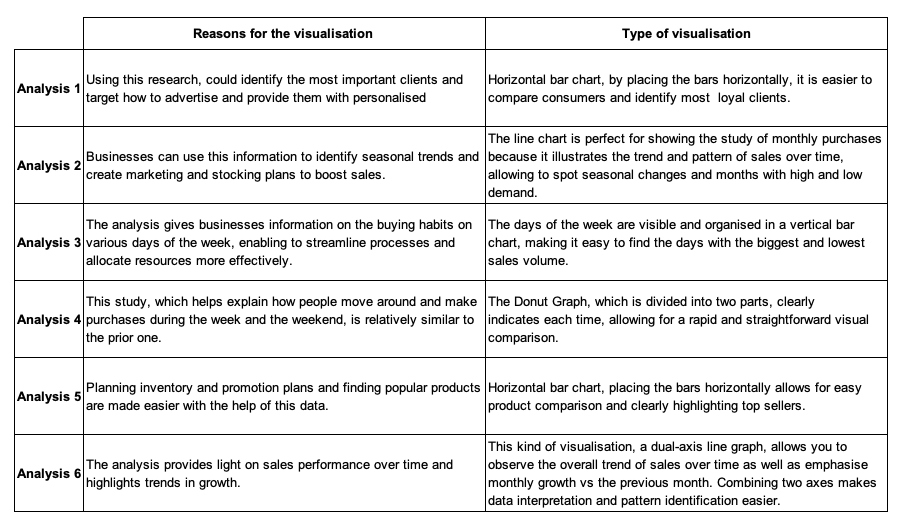

Source: Own elaboration.

#### Data Visualization Data Preparation 

Lohr (2014) of The New York Times said: "Data scientists, according to interviews and expert estimates, spend 50 percent to 80 percent of their time mired in the mundane labor of collecting and preparing unruly digital data, before it can be explored for useful nuggets."

This project was not much different; because it is a chronological comparison, the data must be divided by year and month to aid in visualisation. It is also required to select values, count them, and sort them when working with rankings, sometimes it is necessary to develop other variables when there are none in the dataset, as was the case with 'Growth rate'. Further data preparation was required for each individual view, which is a common practise.

In [14]:
# Analysis 1: Grouping by customer and counting the number of orders for 2014 and 2015.
orders_2014 = df[df['Year'] == 2014].groupby(by='Member_ID', as_index=False)['Item'].count()
top_10_2014 = orders_2014.sort_values(by='Item', ascending=False).head(10)
top_10_2014['Customer'] = top_10_2014['Member_ID'].apply(lambda x: f'ID: {x}')
total_orders_2014 = orders_2014['Item'].sum()  # Calculate the total orders in 2014.
orders_2015 = df[df['Year'] == 2015].groupby(by='Member_ID', as_index=False)['Item'].count()
top_10_2015 = orders_2015.sort_values(by='Item', ascending=False).head(10)
top_10_2015['Customer'] = top_10_2015['Member_ID'].apply(lambda x: f'ID: {x}')
total_orders_2015 = orders_2015['Item'].sum()  # Calculate the total orders in 2015.

In [15]:
# Analysis 2: Group purchases by month/year and count the number of purchases in each period.
df_grouped_1 = df.groupby(df['Date'].dt.strftime('%Y-%m'))['Member_ID'].count().reset_index(name='Amount of purchases')
df_2014_1 = df_grouped_1[df_grouped_1['Date'].str.startswith('2014')]  # Filter data for 2014.
df_2015_1 = df_grouped_1[df_grouped_1['Date'].str.startswith('2015')]  # Filter data for 2015.

In [16]:
# Analysis 3: # Filter the data 2014 and 2015
df_2014 = df[df['Date'].dt.year == 2014] 
df_2015 = df[df['Date'].dt.year == 2015] 

# Group the purchases by day of week for 2014.
df_day_2014 = df_2014.groupby(df_2014['Date'].dt.day_name())['Member_ID'].count().reset_index(name='count')
weekday_order = list(calendar.day_name)
df_day_2014['Date'] = pd.Categorical(df_day_2014['Date'], categories=weekday_order, ordered=True)
df_day_2014 = df_day_2014.sort_values('Date')
# Group the purchases by day of week for 2015.
df_day_2015 = df_2015.groupby(df_2015['Date'].dt.day_name())['Member_ID'].count().reset_index(name='count')
weekday_order = list(calendar.day_name)
df_day_2015['Date'] = pd.Categorical(df_day_2015['Date'], categories=weekday_order, ordered=True)
df_day_2015 = df_day_2015.sort_values('Date')

In [17]:
# Analysis 4: Group the data by day of the week for 2014 and 2015.
grouped_data_2014 = df[df['Date'].dt.year == 2014].groupby('Day_of_Week')['Item'].count()
grouped_data_2015 = df[df['Date'].dt.year == 2015].groupby('Day_of_Week')['Item'].count()
labels = ['Weekday', 'Weekend'] # Create pie charts for 2014 and 2015.
values_2014 = grouped_data_2014.values.tolist()
values_2015 = grouped_data_2015.values.tolist()

In [18]:
# Analysis 5: Group purchases by product and count the number of purchases for each product in 2014 and 2015.
df_product_2014 = df[df['Date'].dt.year == 2014].groupby('Item')['Member_ID'].count().reset_index(name='Quantity of product sold')
df_product_2014 = df_product_2014.sort_values(by='Quantity of product sold', ascending=True).tail(10)  # Top 10 products for 2014 (ordered from highest to lowest).
df_product_2015 = df[df['Date'].dt.year == 2015].groupby('Item')['Member_ID'].count().reset_index(name='Quantity of product sold')
df_product_2015 = df_product_2015.sort_values(by='Quantity of product sold', ascending=True).tail(10)  # Top 10 products for 2015 (ordered from highest to lowest).

In [19]:
# Analysis 6: Group the data by date and count the occurrences for each month.
df_growth = df.groupby(pd.Grouper(key='Date', freq='M')).size().reset_index(name='Total Sales')
df_growth['Growth Rate'] = df_growth['Total Sales'].pct_change().mul(100) # Calculate the growth rate.
df_growth = df_growth.dropna(subset=['Growth Rate']) # Remove the first NaN.
df_growth['Total Sales'] = df_growth['Total Sales'].div(df_growth['Total Sales'].sum()).mul(100) # Convert the 'Total Sales'%.

#### Data Visualization Analyses Graphics 

As it is an interactive board, the Plotly library was an excellent choice. In line with Santos (2022) "It is one of the greatest graphing libraries available for Python, in my opinion, specially because you can interact with the data, making your analysis far more dynamic and getting some more interesting insights than you would have with static graphics."

Below are the analyzes and their respective visualizations.

In [20]:
# Analysis 1: Create the subplots.
fig_customers = sp.make_subplots(rows=1, cols=2, subplot_titles=('Top 10 Customers - 2014', 'Top 10 Customers - 2015'))
fig_customers.add_trace(go.Bar(x=top_10_2014['Item'], y=top_10_2014['Customer'], orientation='h', marker=dict(color='#323F6F')), row=1, col=1) # Add the bar plot for 2014.
fig_customers.add_trace(go.Bar(x=top_10_2015['Item'], y=top_10_2015['Customer'], orientation='h', marker=dict(color='#596D96')), row=1, col=2) # Add the bar plot for 2015.
fig_customers.update_layout(xaxis=dict(title='Number of Orders'), yaxis=dict(title='Customers'), showlegend=False, height=400, width=600, margin=dict(l=50, r=50, t=70, b=50), bargap=0.2) # Update the layout.
fig_customers.show()

In [21]:
# Analysis 2: Group purchases by month/year and count the number of purchases in each period.
fig_line = make_subplots(rows=2, cols=1, subplot_titles=['2014', '2015'])  # Create subplots.
# Create line plot for 2014 and 2015.
fig_line.add_trace(go.Scatter(x=df_2014_1['Date'], y=df_2014_1['Amount of purchases'], mode='lines+markers', name='2014', line=dict(color='#323F6F', width=2), marker=dict(color='#A13D1B', size=8)), row=1, col=1)
# Create line plot for 2015.
# df_2015 = df_grouped[df_grouped['Date'].str.startswith('2015')]  # Filter data for 2015.
fig_line.add_trace(go.Scatter(x=df_2015_1['Date'], y=df_2015_1['Amount of purchases'], mode='lines+markers', name='2015', line=dict(color='#323F6F', width=2), marker=dict(color='#A13D1B', size=8)), row=2, col=1)

# Update layout settings for 2014 and 2015 plots.
fig_line.update_xaxes(showspikes=True, spikethickness=1, spikecolor='black', row=1, col=1)
fig_line.update_yaxes(showspikes=True, spikethickness=1, spikecolor='black', row=1, col=1)
fig_line.update_xaxes(showspikes=True, spikethickness=1, spikecolor='black', row=2, col=1)
fig_line.update_yaxes(showspikes=True, spikethickness=1, spikecolor='black', row=2, col=1)
fig_line.update_layout(width=910, height=350, showlegend=False, title="Monthly Purchases Analysis",title_x=0.5) # Update layout general.

In [22]:
# Analysis 3: Bar Chart.
fig_bar = sp.make_subplots(rows=2, cols=1, subplot_titles=('2014', '2015')) # Create subplots.
fig_bar.add_trace(go.Bar(x=df_day_2014['Date'], y=df_day_2014['count']),row=1,col=1) # Add bar trace for 2014.
fig_bar.add_trace(go.Bar(x=df_day_2015['Date'], y=df_day_2015['count']),row=2,col=1) # Add bar trace for 2015.
fig_bar.update_layout(title='Number of Purchases by Day of Week', title_x=0.5 ,plot_bgcolor='white', width=500,height=400,showlegend=False,margin=dict(t=60, b=60, l=60, r=60))
bar_colors = ['#44592A'] * 7  # Initialize with default color for all days.
bar_colors[5:7] = ['#6C8E41', '#6C8E41']  # Update color for Saturday and Sunday.
fig_bar.update_traces(marker=dict(color=bar_colors),row=1,col=1) # Update bar colors for 2014.
fig_bar.update_traces(marker=dict(color=bar_colors),row=2,col=1) # Update bar colors for 2015.
fig_bar.show()   

In [23]:
# Analysis 4: Create subplots.
fig_pie = sp.make_subplots(rows=1, cols=2, subplot_titles=['2014', '2015'], specs=[[{'type':'pie'}, {'type':'pie'}]])
fig_pie.add_trace(go.Pie(labels=labels, values=values_2014, hole=0.4, marker=dict(colors=['#44592A', '#6C8E41']), textinfo='label+percent', textposition='inside', showlegend=False), row=1, col=1)  # Add pie chart for 2014.
fig_pie.add_trace(go.Pie(labels=labels, values=values_2015, hole=0.4, marker=dict(colors=['#44592A', '#6C8E41']), textinfo='label+percent', textposition='inside', showlegend=False), row=1, col=2)  # Add pie chart for 2015.
fig_pie.update_layout(title='Items Purchased on Weekdays vs Weekends',title_x=0.5,plot_bgcolor='white',width=700,height=600) # Update layout settings.

# Add annotations in the center.
annotations = [dict(text='2014', x=0.22, y=0.47, font_size=20, showarrow=False), dict(text='2015', x=0.78, y=0.47, font_size=20, showarrow=False)]
fig_pie.update_layout(annotations=annotations)
fig_pie.show()

In [24]:
# Analysis 5: Create subplots.
fig_top_products = make_subplots(rows=1, cols=2, subplot_titles=['Top 10 Products - 2014', 'Top 10 Products - 2015'], horizontal_spacing=0.2)

# Calculate the percentages for each product in 2014 and 2015.
percentage_2014 = [(val / df_product_2014['Quantity of product sold'].sum()) * 100 for val in df_product_2014['Quantity of product sold']]
percentage_2015 = [(val / df_product_2015['Quantity of product sold'].sum()) * 100 for val in df_product_2015['Quantity of product sold']]

# Add bar chart for top 10 products in 2014 and 2015.
fig_top_products.add_trace(go.Bar(x=df_product_2014['Quantity of product sold'], y=df_product_2014['Item'], orientation='h', marker=dict(color='#A13D1B'), text=[f'{percentage:.1f}%' for percentage in percentage_2014],
                                 textposition='auto'), row=1, col=1)  # Add bar chart for 2014.
fig_top_products.add_trace(go.Bar(x=df_product_2015['Quantity of product sold'], y=df_product_2015['Item'], orientation='h', marker=dict(color='#A13D1B'), text=[f'{percentage:.1f}%' for percentage in percentage_2015],
                                 textposition='auto'), row=1, col=2)  # Add bar chart for 2015.
fig_top_products.update_layout(plot_bgcolor="white", width=700, height=450, yaxis={'categoryorder': 'total ascending'},showlegend=False, margin=dict(t=60, b=60, l=60, r=60)) # Update layout settings. Add space between subplots.
fig_top_products.show()

In [25]:
# Analysis 6: Sales and Month Growth, Create subplots.
fig_growth = make_subplots(specs=[[{"secondary_y": True}]])

# Add first line and setting Hovermode.
fig_growth.add_trace(go.Scatter(x=df_growth['Date'], y=df_growth['Total Sales'], name='Sales',hovertemplate='Date: %{x}<br>Sales: %{y:.2f}%',
                         mode='lines+markers',line=dict(color='#323F6F', width=2),marker=dict(color='#A13D1B', size=6)),secondary_y=False)

# Add second line and setting Hovermode(They are different.)
fig_growth.add_trace(go.Scatter(x=df_growth['Date'], y=df_growth['Growth Rate'], name='Month Growth',hovertemplate='Date: %{x}<br>Month Growth: %{y:.2f}%',
                         mode='lines+markers',line=dict(color='#44592A', width=2),marker=dict(color='#A13D1B', size=6)),secondary_y=True)

# Update the axis labels.
fig_growth.update_xaxes(title='Date', showgrid=True, gridwidth=1, gridcolor='lightgray')
fig_growth.update_yaxes(title='Sales', secondary_y=False, showgrid=True, gridwidth=1, gridcolor='lightgray')
fig_growth.update_yaxes(title='Month Growth', secondary_y=True, showgrid=True, gridwidth=1, gridcolor='lightgray')

# Update the layout settings for the plot.
fig_growth.update_layout(plot_bgcolor="white",title=dict(text='Sales and Month Growth', x=0.5),title_font=dict(size=19),width=910,height=350,legend=dict(x=0, y=1, orientation='h'))
fig_growth.update_yaxes(title='Sales (%)', range=[0, max(df_growth['Total Sales']) * 1.1], secondary_y=False)
fig_growth.update_yaxes(title='Month Growth (%)', range=[df_growth['Growth Rate'].min() * 1.1, df_growth['Growth Rate'].max() * 1.1], secondary_y=True)
fig_growth.show()

<h3 style="text-align:center;font-weight:bold">Outcome - Data Visualizations</h3>

Several analyses can be derived from this table; unfortunately, we do not have access to the revenue of the market in question, but multiple analyses can be performed even without this information.

* From February 2014 to February 2015, there was a considerable reduction in sales.


* August and September 2015 saw a gain in sales compared to the previous year, which saw a significant decrease.


* The best-selling products stay consistent from year to year, but the defining ones, such as milk, highlight their sales potential, accounting for 16-18% of overall sales.


* The market sells in average more on weekends than during the week, allowing management to watch client routines, take focus on inventory levels, and replace workers.


* There are no clients who stand out significantly in comparison to others in terms of purchase, however a deeper analysis can be conducted  to change it.


* The blue line indicates that total sales are fairly stable, although the rate of grow fluctuates greatly when compared to previous periods. Being able to track seasonal changes, product performance, and external influences such as the economy.

<h3 style="text-align:center;font-weight:bold">Preparing Invoice (Member ID) - Product (Item/ StockCode) Matrix</h3>

Continuing the basket analysis in this stage, the matrix will be created, which counts the number of purchases of each item for each customer and reorganises the data in a handy tabular structure for model analysis. (Chaudhary, 2023)

#### Product (Item)

In [26]:
# Grouping by customer and product, and counting the number of each item purchased.
customer_item_counts = df.groupby(['Member_ID', 'Item'])['Item'].count()

# Reshaping the data to have each customer as a row, and the count of each item as a column.
df_basket = customer_item_counts.unstack().fillna(0)
print("\nShape of the data frame:", df_basket.shape)
display(df_basket.head()) # Display first 5 records.


Shape of the data frame: (3898, 167)


Item       ABRASIVE CLEANER  ARTIF. SWEETENER  BABY COSMETICS  BAGS  \
Member_ID                                                             
1000                   0.00              0.00            0.00  0.00   
1001                   0.00              0.00            0.00  0.00   
1002                   0.00              0.00            0.00  0.00   
1003                   0.00              0.00            0.00  0.00   
1004                   0.00              0.00            0.00  0.00   

Item       BAKING POWDER  BATHROOM CLEANER  BEEF  BERRIES  BEVERAGES  \
Member_ID                                                              
1000                0.00              0.00  0.00     0.00       0.00   
1001                0.00              0.00  1.00     0.00       0.00   
1002                0.00              0.00  0.00     0.00       0.00   
1003                0.00              0.00  0.00     0.00       0.00   
1004                0.00              0.00  0.00     0.00       0.00   

Item       BOTTLED BEER  BOTTLED WATER  BRANDY  BROWN BREAD  BUTTER  \
Member_ID                                                             
1000               0.00           0.00    0.00         0.00    0.00   
1001               0.00           0.00    0.00         0.00    0.00   
1002               0.00           0.00    0.00         0.00    1.00   
1003               0.00           0.00    0.00         0.00    0.00   
1004               0.00           0.00    0.00         0.00    0.00   

Item       BUTTER MILK  CAKE BAR  CANDLES  CANDY  CANNED BEER  CANNED FISH  \
Member_ID                                                                    
1000              0.00      0.00     0.00   0.00         1.00         0.00   
1001              0.00      0.00     0.00   0.00         0.00         0.00   
1002              1.00      0.00     0.00   0.00         0.00         0.00   
1003              0.00      0.00     0.00   0.00         0.00         0.00   
1004              0.00      0.00     0.00   0.00         1.00         0.00   

Item       CANNED FRUIT  CANNED VEGETABLES  CAT FOOD  CEREALS  CHEWING GUM  \
Member_ID                                                                    
1000               0.00               0.00      0.00     0.00         0.00   
1001               0.00               0.00      0.00     0.00         0.00   
1002               0.00               0.00      0.00     0.00         0.00   
1003               0.00               0.00      0.00     0.00         0.00   
1004               0.00               0.00      0.00     0.00         0.00   

Item       CHICKEN  CHOCOLATE  CHOCOLATE MARSHMALLOW  CITRUS FRUIT  CLEANER  \
Member_ID                                                                     
1000          0.00       0.00                   0.00          0.00     0.00   
1001          0.00       0.00                   0.00          0.00     0.00   
1002          0.00       0.00                   0.00          0.00     0.00   
1003          0.00       0.00                   0.00          0.00     0.00   
1004          0.00       2.00                   0.00          0.00     0.00   

Item       CLING FILM/BAGS  COCOA DRINKS  COFFEE  CONDENSED MILK  \
Member_ID                                                          
1000                  0.00          0.00    0.00            0.00   
1001                  0.00          0.00    0.00            0.00   
1002                  0.00          0.00    0.00            0.00   
1003                  0.00          0.00    0.00            0.00   
1004                  1.00          0.00    0.00            0.00   

Item       COOKING CHOCOLATE  COOKWARE  CREAM  CREAM CHEESE   CURD  \
Member_ID                                                            
1000                    0.00      0.00   0.00           0.00  0.00   
1001                    0.00      0.00   0.00           0.00  1.00   
1002                    0.00      0.00   0.00           0.00  0.00   
1003                    

#### Product (Stock Code)

In [27]:
# Grouping by customer and product, and counting the number of each item purchased.
customer_item_counts = df.groupby(['Member_ID', 'Stock_Code'])['Item'].count()

# Reshaping the data to have each customer as a row, and the count of each item as a column.
df_basket = customer_item_counts.unstack().fillna(0)

print("\nShape of the data frame:", df_basket.shape)
display(df_basket.head())# Display first 5 records.


Shape of the data frame: (3898, 167)


Stock_Code  1    2    3    4    5    6    7    8    9    10   11   12   13   \
Member_ID                                                                     
1000       0.00 0.00 0.00 1.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00   
1001       0.00 0.00 1.00 2.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00   
1002       0.00 0.00 0.00 0.00 1.00 0.00 1.00 1.00 0.00 0.00 1.00 0.00 0.00   
1003       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00   
1004       0.00 0.00 0.00 0.00 2.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00   

Stock_Code  14   15   16   17   18   19   20   21   22   23   24   25   26   \
Member_ID                                                                     
1000       0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00 0.00 0.00 0.00   
1001       0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00 1.00 0.00 0.00   
1002       0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00   
1003       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1004       0.00 0.00 1.00 0.00 0.00 0.00 0.00 3.00 0.00 0.00 0.00 0.00 0.00   

Stock_Code  27   28   29   30   31   32   33   34   35   36   37   38   39   \
Member_ID                                                                     
1000       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
1001       0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00 0.00 1.00 0.00   
1002       0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1003       0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1004       0.00 2.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   

Stock_Code  40   41   42   43   44   45   46   47   48   49   50   51   52   \
Member_ID                                                                     
1000       1.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00   
1001       0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1002       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00   
1003       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00   
1004       1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   

Stock_Code  53   54   55   56   57   58   59   60   61   62   63   64   65   \
Member_ID                                                                     
1000       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00   
1001       0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1002       0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1003       0.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1004       1.00 0.00 0.00 0.00 0.00 2.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

Stock_Code  66   67   68   69   70   71   72   73   74   75   76   77   78   \
Member_ID                                                                     
1000       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1001       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1002       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1003       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1004       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   

Stock_Code  79   80   81   82   83   84   85   86   87   88   89   90   91   \
Member_ID                                                                     
1000       0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1001       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1002       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1003       0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1004       1.00 0.00 1.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

Stock_Code  92   93   94   95   96   97   98   99   100  101  102  103  104  \
Member_ID                                  

Above are two identical matrices, one constructed with the column of the item and the other with the stock code, resulting in a cleaner and more organised matrix. Each transaction (row) was filled by the quality of the products sold.

In [28]:
# The transformation is beneficial since it allows us to simplify the study by focusing on the presence or 
# absence of products in customer shopping baskets.
def encode_units(x):
    return 1 if x >= 1 else 0
# Apply the encode_units function to the basket DataFrame.
df_basket = df_basket.applymap(encode_units)

<h3 style="text-align:center;font-weight:bold">Product name corresponding to the stock code</h3>

In [29]:
# In case the user is interested to know the item's description, the function below was used to aid in 
# the analysis of the outputs made by the model's association rules. (Ilgun Cagirici, 2022)
def Check_ID(dataframe, stockcode):
    """
    Given a stock code, returns the stock code and the corresponding product name. 
    If the stock code is not found in the DataFrame, returns None.
    """
    try:
        product_name = dataframe.loc[dataframe["Stock_Code"] == stockcode, "Item"].iloc[0]
        return stockcode, product_name
    except IndexError:
        return None

In [30]:
result = Check_ID(df, 21)
if result is not None:
    stockcode, product_name = result
    print(f"Product name for stock code {stockcode}: {product_name}")
else:
    print(f"Stock code {stockcode} not found in DataFrame")


Product name for stock code 21: WHOLE MILK


In [31]:
result = Check_ID(df, 5)
if result is not None:
    stockcode, product_name = result
    print(f"Product name for stock code {stockcode}: {product_name}")
else:
    print(f"Stock code {stockcode} not found in DataFrame")

Product name for stock code 5: OTHER VEGETABLES


In [32]:
result = Check_ID(df, 58)
if result is not None:
    stockcode, product_name = result
    print(f"Product name for stock code {stockcode}: {product_name}")
else:
    print(f"Stock code {stockcode} not found in DataFrame")

Product name for stock code 58: ROLLS/BUNS


<h3 style="text-align:center;font-weight:bold">Market Basket Analysis Moldels</h3>

Below is a table that was built to provide definitions for each of these modules.

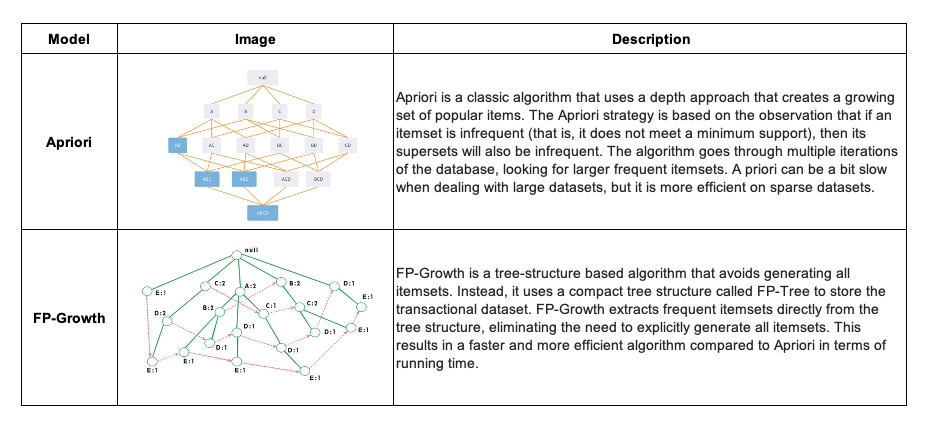

Source: Data from (Verma, 2021)

<h3 style="text-align:center;font-weight:bold">Association Rules</h3>

Another table is provided below to provide a definition of the association rules. According to Ali (2020) "Rules can be used to improve decision-making in sales, marketing, and product recommendation techniques by providing information on what items are usually purchased together." 

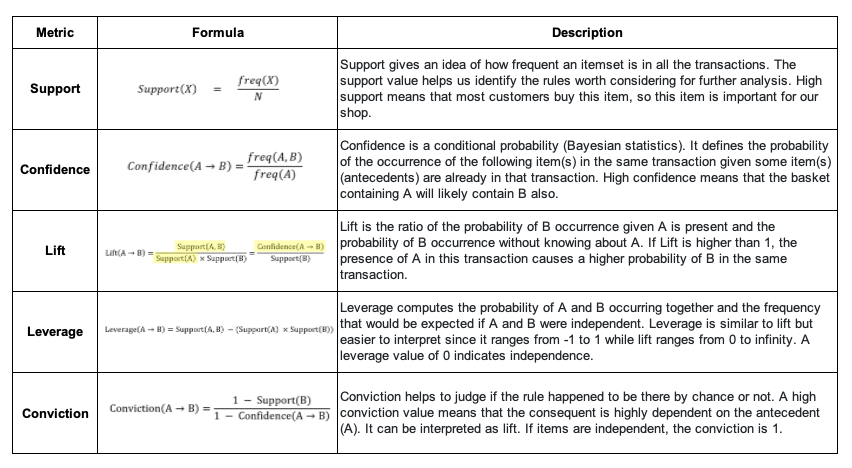

Source: Data from Kimnaruk (2022)

 # 

<h2 style="text-align:center;font-weight:bold">Apriori Algorithm vs FP-Growth Algorithm (Implementation)</h2>

Applying the models first, let set min_support = 0.01, which acts as a "filter," with the result that it will only be considered common if it appears in at least 1% of transactions. The running time in both models will be recorded for future comparing. The algorithm will generate frequent itemsets.

In [33]:
min_support = 0.01 # Define the minimum support threshold.
start_time_apriori = time.time() # Execution time.

# Apply Apriori algorithm to generate frequent itemsets.
frequent_itemsets_apriori = apriori(df_basket, min_support=min_support, use_colnames=True)
end_time_apriori = time.time() # Execution time.

# Sort frequent itemsets (Apriori) by support in descending order.
# Organise them in descending order of support, allowing you to see the most frequent itemsets first.
frequent_itemsets_apriori = frequent_itemsets_apriori.sort_values(by='support', ascending=False)

# Print frequent itemsets (Apriori).
print("\nFrequent Itemsets Apriori:")
display(frequent_itemsets_apriori.head(10))
print(f"\nExecution Time Apriori: {end_time_apriori - start_time_apriori:.4f} seconds.")


Frequent Itemsets Apriori:


support itemsets
19      0.46     (21)
4       0.38      (5)
56      0.35     (58)
3       0.31      (4)
5       0.28      (6)
10      0.23     (11)
29      0.23     (31)
12      0.21     (13)
11      0.21     (12)
327     0.19  (21, 5)


Execution Time Apriori: 8.5635 seconds.


In [34]:
start_time_fpgrowth = time.time() # Execution time.

# Apply FP-Growth algorithm to generate frequent itemsets.
frequent_itemsets_fpgrowth = fpgrowth(df_basket, min_support=min_support, use_colnames=True)
end_time_fpgrowth = time.time() # Execution time.

# Sort frequent itemsets (FP-Growth) by support in descending order.
frequent_itemsets_fpgrowth = frequent_itemsets_fpgrowth.sort_values(by='support', ascending=False)

# Print frequent itemsets (FP-Growth).
print("\nFrequent Itemsets FP-Growth:")
display(frequent_itemsets_fpgrowth.head(10))
print(f"\nExecution Time FP-Growth: {end_time_fpgrowth - start_time_fpgrowth:.4f} seconds.")


Frequent Itemsets FP-Growth:


support itemsets
0       0.46     (21)
17      0.38      (5)
11      0.35     (58)
1       0.31      (4)
2       0.28      (6)
18      0.23     (11)
24      0.23     (31)
36      0.21     (13)
3       0.21     (12)
862     0.19  (21, 5)


Execution Time FP-Growth: 0.5174 seconds.


#### Data visualization comparison Apriori vs FP-Growth Time 

The bar chart below enables us to quickly check what has been raised over time. (Machine Learning on GPU, 2022)

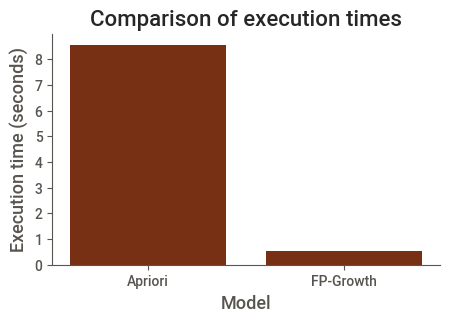

In [35]:
# Execution times of the models.
apriori_time = end_time_apriori - start_time_apriori
fpgrowth_time = end_time_fpgrowth - start_time_fpgrowth

# Create bar chart.
fig, ax = plt.subplots(figsize=(5,3))# Width and height.
ax.bar(['Apriori', 'FP-Growth'], [apriori_time, fpgrowth_time],color='#783014')
ax.set_title('Comparison of execution times',fontsize=16, fontweight="bold")# Title.
ax.set_xlabel('Model',fontsize=13) # Configure x,y-axis settings.
ax.set_ylabel('Execution time (seconds)',fontsize=13)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
sns.despine() # Remove spines.
plt.show()

<h3 style="text-align:center;font-weight:bold">Apriori Algorithm vs FP-Growth Algorithm  Association rules (Implementation)</h3>

In this step, an association of rule combinations is established; depending on the size of the sample being studied, there are thousands of possible combinations. In this case, the rules are filtered with the following criteria:

In [36]:
# The rule's support implying that the rule is supported by at least 1% of transactions.
# The rule's confidence indicating that the rule happens with a high frequency in transactions containing the antecedent.
# The rule lift indicating that there is a positive relationship between the antecedent and the consequent.

# Generate association rules Apriori.
rules_apriori= association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=0.01)

# Filter association rules by support, confidence, and lift.
filtered_rules_apriori = rules_apriori[(rules_apriori["support"] > 0.01) &
                               (rules_apriori["confidence"] > 0.05) &
                               (rules_apriori["lift"] > 1)].sort_values("lift", ascending=False)

# Print association rules.
print("\nFiltered Association Rules:")
display(filtered_rules_apriori.head(10))


Filtered Association Rules:


antecedents   consequents  antecedent support  consequent support  \
7333        (58, 6)   (21, 12, 5)                0.11                0.05   
7320    (21, 12, 5)       (58, 6)                0.05                0.11   
7319     (58, 5, 6)      (12, 21)                0.05                0.11   
7334       (12, 21)    (58, 5, 6)                0.11                0.05   
15146        (3, 6)      (12, 21)                0.04                0.11   
15147      (12, 21)        (3, 6)                0.11                0.04   
7326   (58, 12, 21)        (5, 6)                0.05                0.12   
7327         (5, 6)  (58, 12, 21)                0.12                0.05   
7335       (58, 12)    (21, 5, 6)                0.08                0.07   
7318     (21, 5, 6)      (58, 12)                0.07                0.08   

       support  confidence  lift  leverage  conviction  zhangs_metric  
7333      0.01        0.12  2.43      0.01        1.08           0.66  
7320      0.01        0.27  2.43      0.01        1.22           0.62  
7319      0.01        0.26  2.43      0.01        1.21           0.62  
7334      0.01        0.13  2.43      0.01        1.09           0.66  
15146     0.01        0.25  2.32      0.01        1.19           0.59  
15147     0.01        0.09  2.32      0.01        1.06           0.64  
7326      0.01        0.28  2.32      0.01        1.22           0.60  
7327      0.01        0.11  2.32      0.01        1.07           0.65  
7335      0.01        0.17  2.30      0.01        1.11           0.62  
7318      0.01        0.19  2.30      0.01        1.13           0.61

In [37]:
# Generate association rules FP-Growth.
rules_fpgrowth= association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=0.05)

# Filter association rules by support, confidence, and lift.
filtered_rules_fpgrowth = rules_fpgrowth[(rules_fpgrowth["support"] > 0.01) &
                                         (rules_fpgrowth["confidence"] > 0.05) &
                                         (rules_fpgrowth["lift"] > 1)].sort_values("lift", ascending=False)

# Print association rules.
print("\nFiltered Association Rules:")
display(filtered_rules_fpgrowth.head(10))


Filtered Association Rules:


antecedents   consequents  antecedent support  consequent support  \
7202    (21, 12, 5)       (58, 6)                0.05                0.11   
7215        (58, 6)   (21, 12, 5)                0.11                0.05   
7201     (58, 5, 6)      (12, 21)                0.05                0.11   
7216       (12, 21)    (58, 5, 6)                0.11                0.05   
15201      (12, 21)        (3, 6)                0.11                0.04   
15200        (3, 6)      (12, 21)                0.04                0.11   
7208   (58, 12, 21)        (5, 6)                0.05                0.12   
7209         (5, 6)  (58, 12, 21)                0.12                0.05   
7200     (21, 5, 6)      (58, 12)                0.07                0.08   
7217       (58, 12)    (21, 5, 6)                0.08                0.07   

       support  confidence  lift  leverage  conviction  zhangs_metric  
7202      0.01        0.27  2.43      0.01        1.22           0.62  
7215      0.01        0.12  2.43      0.01        1.08           0.66  
7201      0.01        0.26  2.43      0.01        1.21           0.62  
7216      0.01        0.13  2.43      0.01        1.09           0.66  
15201     0.01        0.09  2.32      0.01        1.06           0.64  
15200     0.01        0.25  2.32      0.01        1.19           0.59  
7208      0.01        0.28  2.32      0.01        1.22           0.60  
7209      0.01        0.11  2.32      0.01        1.07           0.65  
7200      0.01        0.19  2.30      0.01        1.13           0.61  
7217      0.01        0.17  2.30      0.01        1.11           0.62

<h2 style="text-align:center;font-weight:bold">Apriori Algorithm vs FP-Growth Algorithm (Comparison)</h2>

Some information can be highlighted in the tables above at the level of understanding:

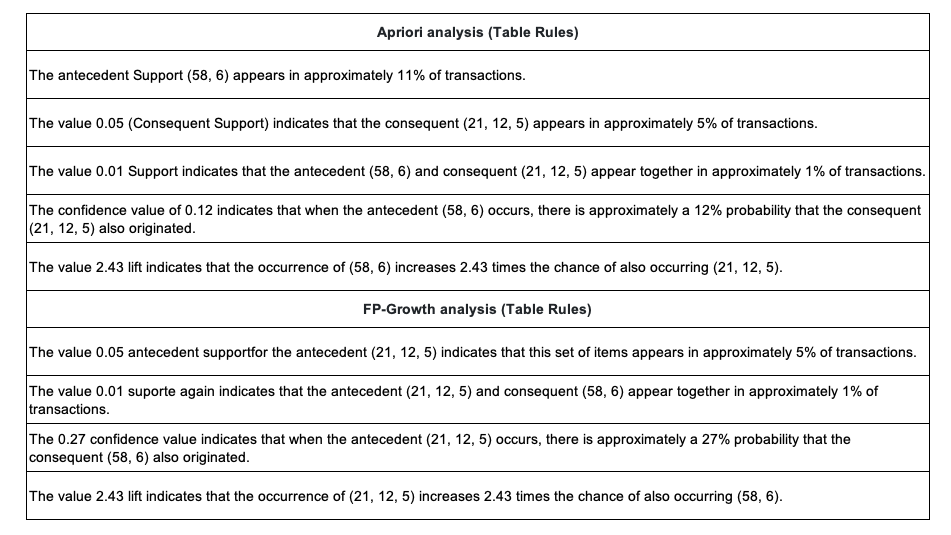

Source: Own elaboration.

Initially, there was not a significant difference between them in the classification of these most common items; it can be seen that the first ten items are extremely equal, with no differences even in the support. However, the processing time of FP-Growth was about ten times faster than Apriori, which can be a disadvantage in large-scale  data analysis. In the table, wit can see the some differences between the Apriori and FP-Growth algorithms by Verma (2021)

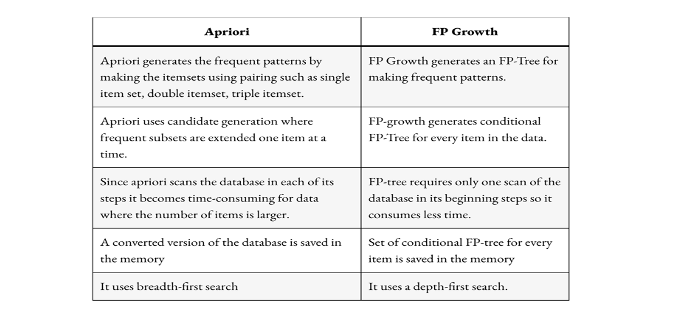

Source: Data from (Verma, 2021)

<h3 style="text-align:center;font-weight:bold">Graphical view of the relationships between the most frequently associated items.</h3>

The Graphs view is a helpful tool for interactively viewing these rules. Hong (2021) As reported by "As one example, clustering algorithms let you see if there are naturally occurring families of products that seem to play well together. Alternatively, you could find products with the highest potential to lift other products, while at the same time look for opportunities to optimize your assortment and sunset products that don’t fit."


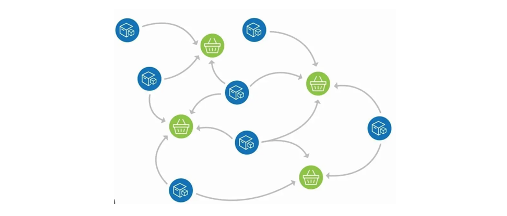

Source: Data from (Hong, 2021)

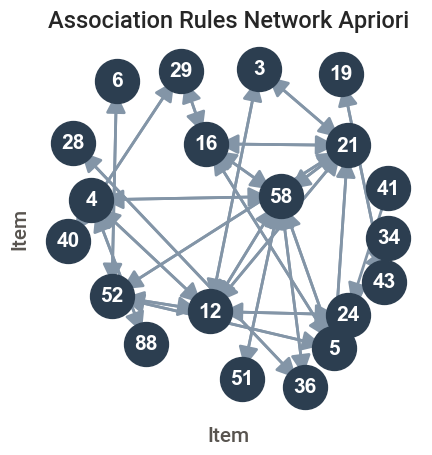

In [38]:
# Filter the first 100 rules based on support metric.
rules_apriori_top100 = filtered_rules_apriori.sort_values("lift", ascending=False).head(100)
G = nx.DiGraph() # Create a directed graph.

# Add nodes to the graph for each item in the antecedents and consequents.
for antecedent in rules_apriori_top100['antecedents']:
    G.add_node(list(antecedent)[0])
for consequent in rules_apriori_top100['consequents']:
    G.add_node(list(consequent)[0])

# Add edges to the graph for each rule.
for index, row in rules_apriori_top100.iterrows():
    G.add_edge(list(row['antecedents'])[0], list(row['consequents'])[0], weight=row['support'])

plt.figure(figsize=(5, 5)) # Define the size of the figure.
pos = nx.spring_layout(G, k=0.3, iterations=20)# Set the layout of the nodes in the graph.
nx.draw_networkx_nodes(G, pos, node_color='#2C3E50', node_size=1000) # Draw the nodes and edges.
nx.draw_networkx_edges(G, pos, edge_color='#8395A7', width=2, arrowsize=30)
nx.draw_networkx_labels(G, pos, font_size=15, font_weight='bold', font_color='white') # Draw the labels for the nodes.
plt.title('Association Rules Network Apriori', fontsize=17) # Set the title and axis labels.
plt.xlabel('Item', fontsize=15)
plt.ylabel('Item', fontsize=15)
plt.xticks([])  # Remove the axis ticks.
plt.yticks([])
ax = plt.gca() # Remove the spines (borders of the axes).
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

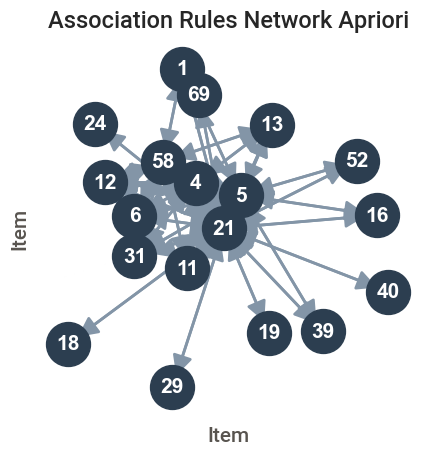

In [39]:
# Filter the first 100 rules based on support metric
rules_fpgrowth_top100 = filtered_rules_fpgrowth.sort_values("support", ascending=False).head(100)
G = nx.DiGraph() # Create a directed graph using the association rules.

# Add nodes to the graph for each item in the antecedents and consequents.
for antecedent in rules_fpgrowth_top100['antecedents']:
    G.add_node(list(antecedent)[0])
for consequent in rules_fpgrowth_top100['consequents']:
    G.add_node(list(consequent)[0])

# Add edges to the graph for each rule.
for index, row in rules_fpgrowth_top100.iterrows():
    G.add_edge(list(row['antecedents'])[0], list(row['consequents'])[0], weight=row['support'])

plt.figure(figsize=(5, 5)) # Define the size of the figure.
pos = nx.spring_layout(G, k=0.3, iterations=20)# Set the layout of the nodes in the graph.
nx.draw_networkx_nodes(G, pos, node_color='#2C3E50', node_size=1000) # Draw the nodes and edges.
nx.draw_networkx_edges(G, pos, edge_color='#8395A7', width=2, arrowsize=30)
nx.draw_networkx_labels(G, pos, font_size=15, font_weight='bold', font_color='white') # Draw the labels for the nodes.
plt.title('Association Rules Network Apriori', fontsize=17) # Set the title and axis labels.
plt.xlabel('Item', fontsize=15)
plt.ylabel('Item', fontsize=15)
plt.xticks([])  # Remove the axis ticks.
plt.yticks([])
ax = plt.gca() # Remove the spines (borders of the axes).
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

<h3 style="text-align:center;font-weight:bold">Applied Market Basket Analysis</h3>

In simple terms, this function employs lift control and confidence to determine the most popular products along with a given stock code using the FP-Growth algorithm.

In [40]:
def products_sold_together(stock_code, min_support=0.01, min_confidence=0.5):
    # Filter the dataframe to include only the specified stock code.
    item_df = df_basket[df_basket[stock_code] == 1]
    frequent_itemsets_fpgrowth = fpgrowth(item_df, min_support=min_support, use_colnames=True) # Apply FP-Growth algorithm to generate frequent itemsets.
    rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=0.05) # Generate association rules using FP-Growth.

    # Filter the association rules by lift and confidence, and sort by lift and support.
    frequent_items = rules_fpgrowth[(rules_fpgrowth['lift'] > 1) & (rules_fpgrowth['confidence'] >= min_confidence)].sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)
    frequent_items['consequents'] = frequent_items['consequents'].apply(lambda x: list(x)) # Convert the consequents column to a list of lists.   
    print('Items frequently sold together with {0}:'.format(stock_code))
    return frequent_items['consequents'].head(5).tolist()

In [41]:
# Applying the function to a specific item:
products_sold_together(5)

Items frequently sold together with 5:


[[21, 6], [21, 6], [21, 5, 6], [21, 6], [21, 6]]

(Bezerra , 2023)

<h3 style="text-align:center;font-weight:bold">Association rules possibilities</h3>

These calculations provide perspective on the complexity and potential number of association rules that can be derived from the dataset.

In [42]:
num_itemsets = len(df_basket.columns) # Calculate the number of unique itemsets.
num_combinations = 2**num_itemsets - 1 # Calculate the total number of possible combinations.
num_rules = (2 ** num_itemsets - 1) ** 2 - (2 ** num_itemsets - 1) # Calculate the total number of possible association rules.
print(f"\nNumber of unique itemsets: {num_itemsets}")
print(f"\nNumber of possible combinations: {num_combinations}")
print(f"\nNumber of possible association rules: {num_rules}")


Number of unique itemsets: 167

Number of possible combinations: 187072209578355573530071658587684226515959365500927

Number of possible association rules: 34996011596528190789960035633881941845650710894290837766183594635838657772214251718896662954272358402


<h3 style="text-align:center;font-weight:bold">Basket Analysis review</h3>

It was observed that the product (code 21: WHOLE MILK) was consistently present and had several connections, regardless of the model used. Excluding products that stand out in comparison to the rest (outliers) and conducting new analyses without them might be a practical strategy.

Another factor to be looked into is the layout of the location where these products are stored in points where the customer must go through the market to get them. In the case of (code 21: WHOLE MILK) and others also with high confidence would be a key product for application of the promotion along with other products that are less sold.

According to Wingfield (2023) "The goal of cross-selling is to sell an additional product or service to an existing customer. Market basket analysis assesses whether the purchase of the product increases the likelihood of the purchase of other products, so that marketers can bundle products or develop other cross-selling strategies."   

Maintaining Wingfield's (2023) "Identifying products that are often purchased together through market basket analysis helps optimize the placement of products in stores, in catalogs and on a web site. Placing those associated items close by increases encourages the buyer to purchase multiple products."

<h2 style="text-align:center;font-weight:bold">Conclusion</h2>

The study emphasises the value of strategies like shopping basket analysis in the online retail industry. Additionally, the focus on visualisation approaches highlights their important function in defining and supporting decision-making processes in the retail sector.

"Data isn’t units of information. Data is a story about human behavior - about real people's wants, needs, goals and fears. Never let the numbers, platforms, charts and methodologies cloud your vision. Our real job with data is to better understand these very human stories, so we can better serve these people. Every goal your business has is directly tied to your success in understanding and serving people." — Daniel Burstein

<h2 style="text-align:center;font-weight:bold">Reference list</h2>

Ali, A. (2020). Association Rule(Apriori and Eclat Algorithm). [online] Wavy AI Research Foundation. Available at: https://medium.com/machine-learning-researcher/association-rule-apriori-and-eclat-algorithm-4e963fa972a4.

Baptiste Rocca (2019). Introduction to recommender systems. [online] Medium. Available at: https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada.

Bezerra , Z. (2023). Recommendation Systems & Interactive Data Viz. [online] kaggle.com. Available at: https://www.kaggle.com/code/zilmabezerra/recommendation-systems-interactive-data-viz [Accessed 24 May 2023].

CFI Team (2023). YoY (Year over Year). [online] Corporate Finance Institute. Available at: https://corporatefinanceinstitute.com/resources/accounting/year-over-year-yoy-analysis/.

Charming Data (2022). Plotly Dash Tutorial - Interactive Python Web App Development. [online] www.youtube.com. Available at: https://www.youtube.com/watch?v=7m0Bq1EGPPg [Accessed 24 May 2023].

Chaudhary, S. (2023). Understanding Market Basket Analysis in Data Mining. [online] www.turing.com. Available at: https://www.turing.com/kb/market-basket-analysis.

Chen, J. (2019). Growth Rates. [online] Investopedia. Available at: https://www.investopedia.com/terms/g/growthrates.asp.

Codecademy. (n.d.). Seaborn Styling, Part 1: Figure Style and Scale. [online] Available at: https://www.codecademy.com/article/seaborn-design-i.

coresignal.com. (n.d.). 20 Data Science Quotes by Industry Experts. [online] Available at: https://coresignal.com/blog/data-science-quotes/.

Deon, J.V. (2019). Criando paletas de cores para gráficos mais atraentes. [online] Medium. Available at: https://medium.com/@joaovitordeon/criando-paletas-de-cores-para-gr%C3%A1ficos-mais-atraentes-f5a77781e15e [Accessed 24 May 2023].

Di Stefano, A. (2022). Machine Learning in Recommendation Systems: an Overview. [online] www.itransition.com. Available at: https://www.itransition.com/machine-learning/recommendation-systems.

Gunn, G. (2020). How to make your own color palettes. [online] Medium. Available at: https://medium.com/@greggunn/how-to-make-your-own-color-palettes-712959fbf021.

Hong, L. (2021). Next-Gen Basket Analysis With Graph. [online] www.graphable.ai. Available at: https://www.graphable.ai/blog/basket-analysis-with-graph/ [Accessed 25 May 2023].

HOOPER, L. (2021). Um guia completo sobre o gráfico de linhas. [online] Venngage Blog. Available at: https://pt.venngage.com/blog/grafico-de-linhas/.

Ilgun Cagirici, O. (2022). Market Basket Analysis with Apriori Algorithm. [online] kaggle.com. Available at: https://www.kaggle.com/code/ozlemilgun/market-basket-analysis-with-apriori-algorithm#Market-Basket-Analysis-with-Apriori-Algorithm [Accessed 24 May 2023].

K. EMERY, A. (2017). Depict Data Studio. [online] Depict Data Studio. Available at: https://depictdatastudio.com/when-to-use-horizontal-bar-charts-vs-vertical-column-charts/.

Kapl, D., coding, ylan K. has years of experience as a S.D.S.H. enjoys, teaching and everyone, has created this website to make M.L. accessible to (2022). Machine Learning 101: CountVectorizer Vs TFIDFVectorizer» EML. [online] enjoymachinelearning.com. Available at: https://enjoymachinelearning.com/blog/countvectorizer-vs-tfidfvectorizer/?utm_content=cmp-true.

Kimnaruk, Y. (2022). What are market basket analysis and the apriori algorithm? [online] MLearning.ai. Available at: https://medium.com/mlearning-ai/what-are-market-basket-analysis-and-the-apriori-algorithm-fe0e8e6e34d.
Li, S. (2017). A Gentle Introduction on Market Basket Analysis — Association Rules. [online] Medium. Available at: https://towardsdatascience.com/a-gentle-introduction-on-market-basket-analysis-association-rules-fa4b986a40ce.

Lohr, S. (2014). For Big-Data Scientists, ‘Janitor Work’ Is Key Hurdle to Insights (Published 2014). The New York 
Times. [online] 17 Aug. Available at: https://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor-work.html.

Machine Learning on GPU (2022). Run time comparisons – Machine Learning on GPU. [online] hsf-training.github.io. Available at: https://hsf-training.github.io/hsf-training-ml-gpu-webpage/05-runtime/index.html [Accessed 25 May 2023].

MacKenzie, I., Meyer, C. and Noble, S. (2013). How retailers can keep up with consumers. [online] McKinsey & Company. Available at: https://www.mckinsey.com/industries/retail/our-insights/how-retailers-can-keep-up-with-consumers.

Maruti Techlabs (2017). 5 Advantages Recommendation Engines can Offer to Businesses. [online] Medium. Available at: https://towardsdatascience.com/5-advantages-recommendation-engines-can-offer-to-businesses-10b663977673.

Melanee, M. (2023). What a data scientist should know about machine learning kernels? [online] MLearning.ai. Available at: https://medium.com/mlearning-ai/what-a-data-scientist-should-know-about-machine-learning-kernels-4066f02d1f26 [Accessed 23 May 2023].

Murray, E. (2019). Why Do Bar Charts Work? [online] Forbes. Available at: https://www.forbes.com/sites/evamurray/2019/04/04/why-do-bar-charts-work/?sh=7ae3293ae43e [Accessed 31 Mar. 2023].

Muth, L.C. (2022). What background color should your data vis have? - Datawrapper Blog. [online] blog.datawrapper.de. Available at: https://blog.datawrapper.de/background-color-of-data-visualizations/.

Myrianthous, G. (2022). How To Merge Pandas DataFrames. [online] Medium. Available at: https://towardsdatascience.com/how-to-merge-pandas-dataframes-221e49c41bec [Accessed 22 May 2023].

Nabi, J. (2018). Machine Learning — Text Processing. [online] Towards Data Science. Available at: https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958.

Odegua, R. (2020). Introduction to Data Visualization With Seaborn. [online] The Startup. Available at: https://medium.com/swlh/introduction-to-data-visualization-with-seaborn-6232b70e9b30 [Accessed 1 Apr. 2023].

Paradi, D. (2023). 8 steps to make a professional looking bar chart in Excel or PowerPoint | Think Outside The Slide. [online] www.thinkoutsidetheslide.com. Available at: https://www.thinkoutsidetheslide.com/8-steps-to-make-a-professional-looking-bar-chart-in-excel-or-powerpoint/ [Accessed 14 Apr. 2023].

Patil, R. (2021). SweetViz Library - EDA in Seconds. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/05/sweetviz-library-eda-in-seconds/ [Accessed 22 May 2023].

Payne, C. (2021). Book Cover Design Basics. [online] www.ingramspark.com. Available at: https://www.ingramspark.com/blog/book-cover-design-basics.

R, R. (2021). Cosine Similarity and TFIDF. [online] Web Mining [IS688, Spring 2021]. Available at: https://medium.com/web-mining-is688-spring-2021/cosine-similarity-and-tfidf-c2a7079e13fa.

Roddewig , S. (2022). Removing Duplicated Data in Pandas: A Step-by-Step Guide. [online] blog.hubspot.com. Available at: https://blog.hubspot.com/website/duplicated-pandas.

Santos, G. (2020). Criando Sistemas de Recomendação em Python. [online] Data Hackers. Available at: https://medium.com/data-hackers/criando-sistemas-de-recomenda%C3%A7%C3%A3o-em-python-ef350f601e3d [Accessed 23 May 2023].

Santos, G. (2022). Why You Must Use Plotly Express for Data Visualization. [online] Medium. Available at: https://towardsdatascience.com/why-you-must-use-plotly-express-for-data-visualization-9d47f9182807.

Sareen, S. (2018). Process Text using TFIDF in Python. [online] Medium. Available at: https://towardsdatascience.com/tfidf-for-piece-of-text-in-python-43feccaa74f8 [Accessed 22 May 2023].

Singhal, S. (2020). All About Heatmaps. [online] Medium. Available at: https://towardsdatascience.com/all-about-heatmaps-bb7d97f099d7.

Stack, R. (2023). Chart types for comparing trends over time. [online] Zendesk help. Available at: https://support.zendesk.com/hc/en-us/articles/4408838807194-Chart-types-for-comparing-trends-over-time [Accessed 16 Apr. 2023].

Tableau (2022). What is a dashboard? A complete overview. [online] Tableau. Available at: https://www.tableau.com/learn/articles/dashboards/what-is.

TIBCO Software (2023). What is a Donut Chart? [online] TIBCO Software. Available at: https://www.tibco.com/reference-center/what-is-a-donut-chart.

Tuama, D.Ó. (2022). What are Libraries In Python & How to Use Them. [online] Code Institute Global. Available at: https://codeinstitute.net/ie/blog/what-are-libraries-in-python/.

VELEZ, A. (2021). histogram versus bar graph. [online] storytelling with data. Available at: https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts.

Verma, Y. (2021a). Apriori vs FP-Growth in Market Basket Analysis - A Comparative Guide. [online] Analytics India Magazine. Available at: https://analyticsindiamag.com/apriori-vs-fp-growth-in-market-basket-analysis-a-comparative-guide/.

Verma, Y. (2021b). Apriori vs FP-Growth in Market Basket Analysis - A Comparative Guide. [online] Analytics India Magazine. Available at: https://analyticsindiamag.com/apriori-vs-fp-growth-in-market-basket-analysis-a-comparative-guide/.

Vidya (2018). #2. Use Tick Marks and Gridlines with care. [online] Daydreaming Numbers. Available at: https://daydreamingnumbers.com/blog/use-tick-marks-and-gridlines-with-care/ [Accessed 7 Apr. 2023].

Wingfield, T. (2023). 7 Ways Market Basket Analysis Can Make You More Money. [online] Actian. Available at: https://www.actian.com/blog/data-analytics/market-basket-analysis-profit/ [Accessed 26 May 2023].

www.kaggle.com. (n.d.). Book Recommendation datasets. [online] Available at: https://www.kaggle.com/datasets/zilmabezerra/book-recommendation-datasets [Accessed 22 May 2023].

www.kaggle.com. (n.d.). Groceries dataset. [online] Available at: https://www.kaggle.com/datasets/zilmabezerra/groceries-dataset [Accessed 23 May 2023].

www.turing.com. (n.d.). Understanding Market Basket Analysis in Data Mining. [online] Available at: https://www.turing.com/kb/market-basket-analysis.

Yang, E. (2021). Building a Product Recommendation System with your Sales Data. [online] Medium. Available at: https://towardsdatascience.com/similar-product-recommendations-data-to-deployment-970a085bafce.

Yi, M. (2021). How to Choose Colors for Data Visualizations. [online] Chartio. Available at: https://chartio.com/learn/charts/how-to-choose-colors-data-visualization/.